In [1]:
#Taiwan Options Tracker 台灣指數選擇權績效追蹤
#Chi-Sheng Lo 羅祺勝
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# Load the Excel file
excel_file = pd.ExcelFile('D:\Derivatives Trading\TAIEX derivatives trading record.xlsx')

# Get the sheet you want to read
sheet_name = 'ForPython' # Replace with the name of the sheet you want to read
df = excel_file.parse(sheet_name)

In [2]:
# Output data information
print(df.head())

#******Plotting setup*****#
# Generate some data
Date = df["Date"]
Date
y1 =df["PnL Index"]
y1
y2 = df["TAIEX"]
y2

        Date   PnL Index     TAIEX    VIX   Returns  Unnamed: 5  Unnamed: 6  \
0 2022-07-01  100.000000  14343.08  27.01  0.000000         NaN         NaN   
1 2022-07-04   95.577858  14217.06  27.56 -0.044221         NaN         NaN   
2 2022-07-05   93.953178  14349.20  27.18 -0.016998         NaN         NaN   
3 2022-07-06   92.057052  13985.51  29.40 -0.020182         NaN         NaN   
4 2022-07-07   92.698962  14335.27  28.26  0.006973         NaN         NaN   

    Base  
0  100.0  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


0      14343.08
1      14217.06
2      14349.20
3      13985.51
4      14335.27
         ...   
438    20131.74
439    19857.42
440    20120.51
441    20495.52
442    20396.60
Name: TAIEX, Length: 443, dtype: float64

In [3]:
# Get the maximum PnL value
max_pnl = df['PnL Index'].max()
max_pnl_date = df.loc[df['PnL Index']==max_pnl, 'Date'].values[0]


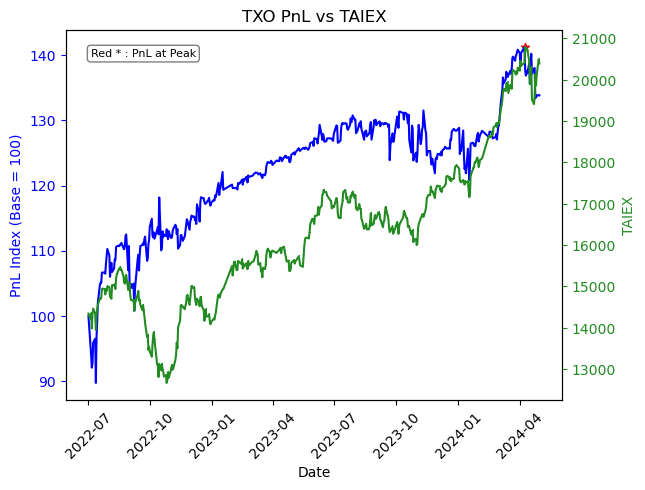

0      27.01
1      27.56
2      27.18
3      29.40
4      28.26
       ...  
438    17.25
439    18.38
440    17.56
441    18.44
442    18.25
Name: VIX, Length: 443, dtype: float64

In [4]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Set the second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(Date, y2, color='forestgreen', marker=',')
ax2.set_ylabel('TAIEX', color='forestgreen')
ax2.tick_params('y', colors='forestgreen')

# Add message box
msg = "Red * : PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('TXO PnL vs TAIEX')
plt.show()

#Pnl vs VIX
y3 = df["VIX"]
y3


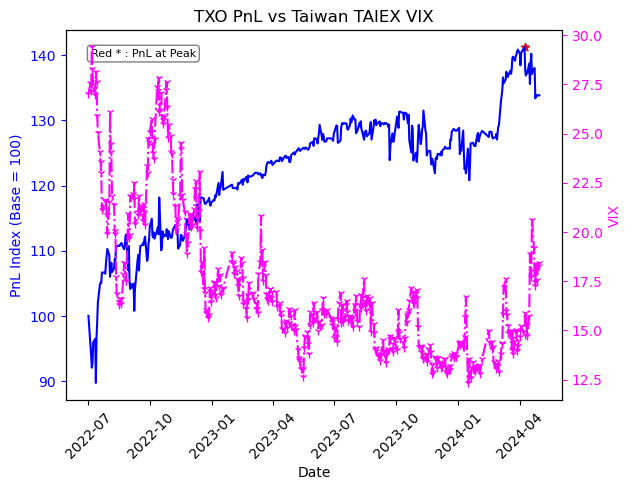

In [5]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Add message box
msg = "Red * : PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Set the second y-axis (right)
ax3 = ax1.twinx()
ax3.plot(Date, y3, 'fuchsia', marker='1', linestyle='-.')
ax3.set_ylabel('VIX', color='fuchsia')
ax3.tick_params('y', colors='fuchsia')


# Show the plot
plt.title('TXO PnL vs Taiwan TAIEX VIX')
plt.show()


In [6]:
#Tracking error between PnL and TAIEX
PNL_returns = df['PnL Index'].pct_change()
TAIEX_returns = df['TAIEX'].pct_change()
diff_returns = PNL_returns  - TAIEX_returns 
tracking_error = diff_returns.std()

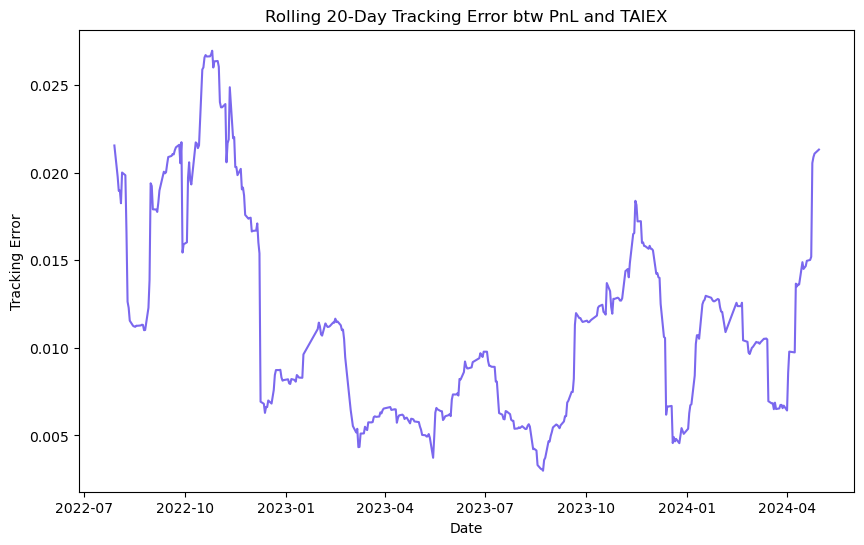

In [7]:
roll_te = diff_returns.rolling(20).std()

plt.figure(figsize=(10, 6))
plt.title('Rolling 20-Day Tracking Error btw PnL and TAIEX')
plt.plot(df['Date'], roll_te, color='mediumslateblue')
plt.xlabel('Date')
plt.ylabel('Tracking Error')
plt.show()

In [8]:
##########################################Performance###############################################
#Sharpe ratio
# Read in the portfolio returns data from a CSV file
R_first=df["PnL Index"].iloc[0,]
R_first
R_last = df["PnL Index"].iloc[-1]   #Always excel's actual row-2
R_last


portfolio_returns=(R_last-R_first)/R_first
portfolio_returns


daily_returns=df["Returns"]
daily_returns


0      0.000000
1     -0.044221
2     -0.016998
3     -0.020182
4      0.006973
         ...   
438   -0.033636
439    0.003763
440   -0.001252
441    0.001391
442   -0.000489
Name: Returns, Length: 443, dtype: float64

In [9]:
# Max Drawdown Calculation for PnL Index
cumulative_returns = (1 + df["Returns"]).cumprod()
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns / cumulative_max) - 1
max_drawdown = drawdown.min()

print("Max Drawdown:", max_drawdown)

Max Drawdown: -0.10420949154156467


In [10]:
# Calculate the excess returns and standard deviation
risk_free_rate = 0.0159  # Taiwan savings rate
excess_returns = portfolio_returns - risk_free_rate
std_dev = np.std(daily_returns)
print("Standard Deviation of Daily Return:", std_dev)



# Calculate the Sharpe ratio
Sharpe_Ratio = excess_returns / std_dev
print("Sharpe Ratio:", Sharpe_Ratio)

Standard Deviation of Daily Return: 0.013137329146847627
Sharpe Ratio: 24.559372796783848


In [11]:
# Convert 'Date' column to datetime if it is not already
df['Date'] = pd.to_datetime(df['Date'])

In [12]:

# Calculate the number of unique trading days
num_trading_days = df['Date'].nunique()
print("Number of Actual Trading Days:", num_trading_days)

Number of Actual Trading Days: 443


In [13]:
#Annualized Sharpe ratio
risk_free_rate_daily = (1 + risk_free_rate) ** (1/250) - 1
risk_free_rate_daily 
average_daily_returns = daily_returns.sum()/num_trading_days
average_daily_returns
excess_daily_return=average_daily_returns-risk_free_rate_daily 
excess_daily_return
Annualized_Sharpe_Ratio=excess_daily_return/std_dev*np.sqrt(250)
print("Annualized Sharpe Ratio:", Annualized_Sharpe_Ratio)

Annualized Sharpe Ratio: 0.8208441756173303


In [14]:
# Calculate the Profit Factor
positive_returns = daily_returns[daily_returns > 0].sum()
negative_returns = daily_returns[daily_returns < 0].sum()

# Avoid division by zero
if negative_returns != 0:
    profit_factor = abs(positive_returns / negative_returns)
else:
    profit_factor = float('inf')

print("Profit Factor:", profit_factor)


Profit Factor: 1.2065314326717609


In [15]:
#Portfolio Alpha
# Compute the mean returns
mean_PNL = PNL_returns.mean()
mean_TAIEX = TAIEX_returns.mean()

# Compute beta
covariance = PNL_returns.cov(TAIEX_returns)
variance = TAIEX_returns.var()
beta = covariance / variance
beta

# Compute alpha (assuming risk-free rate is 0)
alpha = (mean_PNL - (risk_free_rate_daily  +beta * mean_TAIEX))*np.sqrt(250)

# Print alpha
print("Alpha: ", alpha)

Alpha:  0.004402944642608588


In [16]:
# Identify the dates when new peak PnL values occur
peak_pnl_dates = []
peak_pnl = df['PnL Index'].iloc[0]

for index, row in df.iterrows():
    if row['PnL Index'] > peak_pnl:
        peak_pnl = row['PnL Index']
        peak_pnl_dates.append(row['Date'])

# Calculate the number of days between each consecutive peak PnL date
days_between_peaks = []

for i in range(1, len(peak_pnl_dates)):
    days = (peak_pnl_dates[i] - peak_pnl_dates[i-1]).days
    days_between_peaks.append(days)

# Calculate the average number of days between peak PnL dates
if len(days_between_peaks) > 0:
    avg_days_between_peaks = sum(days_between_peaks) / len(days_between_peaks)
    print("Average number of days between new peak PnL values:", avg_days_between_peaks)
else:
    print("There are no new peak PnL values.")

Average number of days between new peak PnL values: 9.447761194029852


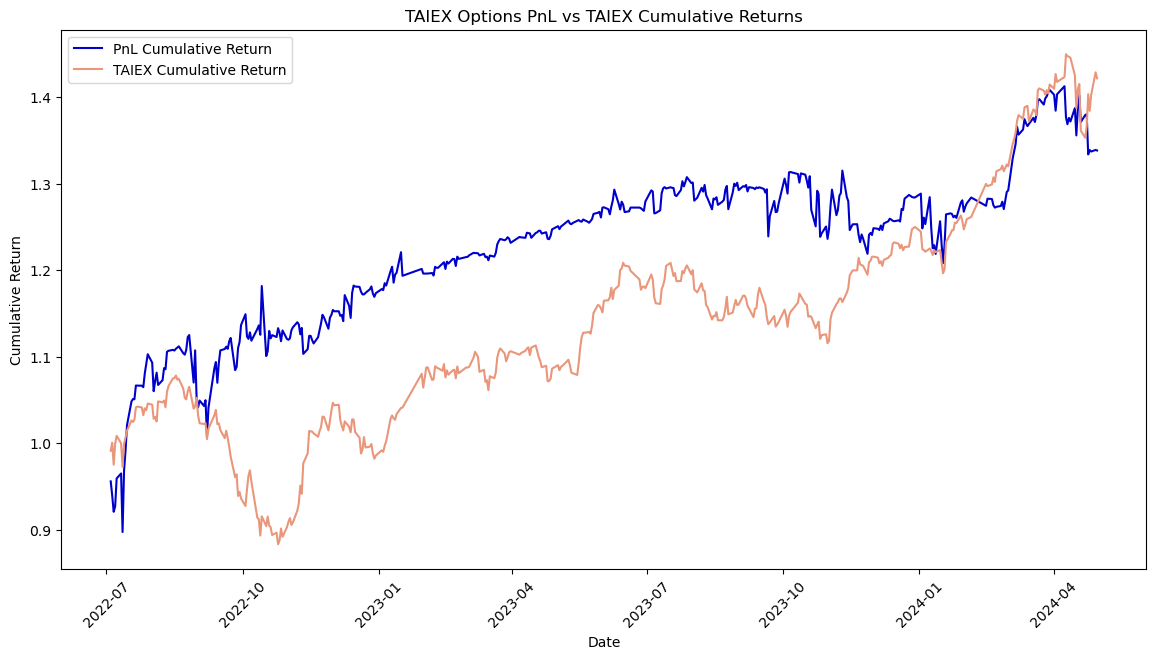

Performance difference between my Options PnL and TAIEX since the beginning: -0.08350704548517784


In [17]:
#Excess return of my Options PnL vesus the TAIEX since the beginning
# Calculate daily returns for PnL and TAIEX
df['PNL_returns'] = df['PnL Index'].pct_change()
df['TAIEX_returns'] = df['TAIEX'].pct_change()

# Calculate cumulative returns for PnL and TAIEX
df['PnL_cumulative_return'] = (1 + df['PNL_returns']).cumprod()
df['TAIEX_cumulative_return'] = (1 + df['TAIEX_returns']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.xticks(rotation=45)
plt.plot(df['Date'], df['PnL_cumulative_return'], label='PnL Cumulative Return',  color='mediumblue')
plt.plot(df['Date'], df['TAIEX_cumulative_return'], label='TAIEX Cumulative Return', color='darksalmon')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('TAIEX Options PnL vs TAIEX Cumulative Returns')
plt.legend()
plt.show()

# Calculate and print the performance difference
performance_difference = df['PnL_cumulative_return'].iloc[-1] - df['TAIEX_cumulative_return'].iloc[-1]
print(f"Performance difference between my Options PnL and TAIEX since the beginning: {performance_difference}")
